# Word Embedding
---


## Import Libraries

In [2]:
# Import
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phrases, Phraser
#import fuzzysearch
#import fuzzywuzzy
import pandas as pd
import PyPDF2

## Read Text from PDF

In [3]:
pdfFileObj = open('20221118-FULL.pdf', 'rb') #Create pdf object
pdfReader = PyPDF2.PdfReader(pdfFileObj) 

allText = ""
for i in range(792): #Iterating over n pages 
    pageObj = pdfReader.pages[i]
    page = pageObj.extract_text()
    allText += page #Store page content into string variable

allText;

## Data Preprocessing 

In [4]:
# Preprocessing
allText = allText.replace(';','')

alltext_string_all = allText.replace('Legal basis',';Legal basis').replace('Identity information',';Identity information').replace('Programme', ';Programme').replace('Birth information',';Birth information').replace('Citizenship information',';Citizenship information').replace('Contact information',';Contact information')
testListSplit = alltext_string_all.split('reference number: EU')
alltext_string_all[:1000]


'EUROPEAN COMMISSION\nFinancial Stability, Financial Services and Capital Markets Union (DG FISMA)\nEuropean Union\nConsolidated Financial Sanctions List\nThis list has been updated on 18/11/2022 11:37European Union Consolidated Financial Sanctions List\nTable of contents\n1. Introduction3 \n2. Individuals or persons3 \n3. Entities or groups631 \n4. Disclaimer792 \nPage 2 on 792European Union Consolidated Financial Sanctions List\n1. INTRODUCTION\nThe present document contains the Consolidated List of persons, groups and entities subject, under EU Sanctions, to an asset freeze and the prohibition to\nmake funds and economic resources available to them. The latest version of this file is here.\n2. INDIVIDUALS OR PERSONS\nEU reference number: EU.1787.1\n;Legal basis: 2017/404 (OJ L63)\n;Programme: AFG - Afghanistan\n;Identity information:\n• Name/Alias: Sirajuddin Jallaloudine Haqqani  Function: Na’ib Amir (Deputy Commander)  \n• Name/Alias: Khalifa  \n• Name/Alias: Saraj Haqani  \n• Nam

In [5]:
# Create dataframe
dbn_df = pd.DataFrame([sub.split(";") for sub in testListSplit])
dbn_df.fillna("",inplace=True)
dbn_df.columns = ['EU Reference', 'Legal basis', 'Programme', 'Identity information', 'Birth information', 'Citizenship information', 'Contact information']
#,'','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']

In [6]:
dbn_df


,EU Reference,Legal basis,Programme,Identity information,Birth information,Citizenship information,Contact information
0,"EUROPEAN COMMISSION\nFinancial Stability, Fina...",,,,,,
1,.1787.1\n,Legal basis: 2017/404 (OJ L63)\n,Programme: AFG - Afghanistan\n,Identity information:\n• Name/Alias: Sirajuddi...,Birth information:\n• Birth date: Circa from 1...,Citizenship information:\n• Citizenship: Afgha...,"Contact information: \n• Address: Pakistan, Mi..."
2,.2272.60\n,Legal basis: 2017/404 (OJ L63)\n,Programme: AFG - Afghanistan\n,Identity information:\n• Name/Alias: Nasiruddi...,Birth information:\n• Birth date: Circa from 1...,Citizenship information:\n• Citizenship: Afgha...,Contact information: \n• Address: Pakistan \n...
3,.2274.87\n,Legal basis: 2017/404 (OJ L63)\n,Programme: AFG - Afghanistan\n,Identity information:\n• Name/Alias: Gul Agha ...,Birth information:\n• Birth date: Circa 1972 ...,Contact information: \n• Address: Pakistan \n...,
4,.2291.0\n,Legal basis: 2017/404 (OJ L63)\n,Programme: AFG - Afghanistan\n,Identity information:\n• Name/Alias: Amir Abdu...,Birth information:\n• Birth date: Circa 1972 ...,Citizenship information:\n• Citizenship: Afgha...,"Contact information: \n• Address: Pakistan, Ka..."
...,...,...,...,...,...,...,...
3635,.9027.6\n,Legal basis: 2022/2229 (OJ L293-I)\n,Programme: UKR - Ukraine\nCompany name:\n• Nam...,,,,
3636,.9028.5\n,Legal basis: 2022/2229 (OJ L293-I)\n,Programme: UKR - Ukraine\nCompany name:\n• Nam...,,,,
3637,.5121.69\n,Legal basis: UNLI - 14.05.2019\n,Programme: UNLI - UN Listing\nPage 790 on 792E...,,,,
3638,.7817.36\n,Legal basis: 2022/419 (OJ L86)\n,Programme: YEM - Yemen\nCompany name:\n• Name:...,,,,


In [7]:
def cleanupDataframe(dataframe):
    dataframe['Legal basis'] = dataframe['Legal basis'].apply(lambda x: x.replace('Legal basis: ','').replace('\n',''))
    dataframe['Programme'] = dataframe['Programme'].apply(lambda x: x.replace('Programme: ','').replace('\n',''))
    dataframe['Identity information'] = dataframe['Identity information'].apply(lambda x: x.replace('Identity information:','').replace('Name/Alias:',';').replace('•','').replace('Function:','').split(';'))
    dataframe.replace('^\s+', '', regex=True, inplace=True) #front
    dataframe.replace('\s+$', '', regex=True, inplace=True) #end
    dataframe['Birth information'] = dataframe['Birth information'].apply(lambda x: x.replace('Birth information:\n•',''))
    return dataframe

def stripDataframe(dataframe):
    dataframe['Identity information'] = dataframe['Identity information'].apply(lambda x: [y.strip() for y in x ])
    return dataframe


# def listCreation(dataframe):
#     identityInformation = []
#     for i in dataframe:
#         temp = dataframe.tolist()
#         identityInformation.append(temp)
#     return identityInformation

In [8]:
cleanupDataframe(dbn_df)
stripDataframe(dbn_df)

,EU Reference,Legal basis,Programme,Identity information,Birth information,Citizenship information,Contact information
0,"EUROPEAN COMMISSION\nFinancial Stability, Fina...",,,[],,,
1,.1787.1,2017/404 (OJ L63),AFG - Afghanistan,"[, Sirajuddin Jallaloudine Haqqani Na’ib Ami...",Birth date: Circa from 1977 to 1978 Birth pl...,Citizenship information:\n• Citizenship: Afgha...,"Contact information: \n• Address: Pakistan, Mi..."
2,.2272.60,2017/404 (OJ L63),AFG - Afghanistan,"[, Nasiruddin Haqqani A leader of the Haqqan...",Birth date: Circa from 1970 to 1973 Birth pl...,Citizenship information:\n• Citizenship: Afgha...,Contact information: \n• Address: Pakistan \n...
3,.2274.87,2017/404 (OJ L63),AFG - Afghanistan,"[, Gul Agha Ishakzai, Mullah Gul Agha, Mullah ...",Birth date: Circa 1972 Birth place: Afghanis...,Contact information: \n• Address: Pakistan \n...,
4,.2291.0,2017/404 (OJ L63),AFG - Afghanistan,"[, Amir Abdullah Former Kandahar Province De...",Birth date: Circa 1972 Birth place: Afghanis...,Citizenship information:\n• Citizenship: Afgha...,"Contact information: \n• Address: Pakistan, Ka..."
...,...,...,...,...,...,...,...
3635,.9027.6,2022/2229 (OJ L293-I),UKR - UkraineCompany name:• Name: Islāma revol...,[],,,
3636,.9028.5,2022/2229 (OJ L293-I),UKR - UkraineCompany name:• Name: صنایع هوایی ...,[],,,
3637,.5121.69,UNLI - 14.05.2019,UNLI - UN ListingPage 790 on 792European Union...,[],,,
3638,.7817.36,2022/419 (OJ L86),YEM - YemenCompany name:• Name: ANSARALLAH• Na...,[],,,


In [9]:
# #dbn_df["Identity information"][1].split(';')
# cleanelement = []
# for element in dbn_df["Identity information"][1].split(';'): 
#     cleanelement.append(element.strip())
#     #element.strip()
# print(cleanelement)

In [10]:
dbn_df.to_excel('NameCorpusPreparation.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

In [12]:
dbn_df.to_csv('EuropeanSanctions.csv', index=True)

In [ ]:
type(dbn_df['Identity information'][0])

list

In [ ]:
print(dbn_df[1])

EU Reference                                                         .296.86
Legal basis                                                2017/404 (OJ L63)
Programme                                                  AFG - Afghanistan
Identity information       ; Ezatullah Haqqani Khan Sayyid  Title: Maulav...
Birth information           Birth date: Circa 1957  Birth place: Afghanis...
Citizenship information    Citizenship information:\n• Citizenship: Afgha...
Contact information                                                         
Name: 10, dtype: object


### Split into Persons Dataframe and Company Dataframe

In [ ]:
print(dbn_df.columns.tolist())

['EU Reference', 'Legal basis', 'Programme', 'Identity information', 'Birth information', 'Citizenship information', 'Contact information']


In [24]:
import jarowinkler

## Fuzzy string matching
---

In [ ]:
from thefuzz import fuzz, process 
import pandas as pd
# Read Csv
df = pd.read_csv("data/EuropeanSanctions.csv")
# Preprocessing
n = df['Identity information'].to_string().split()
n

In [12]:
#name = 'Pascal Breucker'


# Search function
def findBusinessPartner(input, name, threshold):
    namelist = name.split(" ")
    print(namelist)
    count = 0
    resultlist = []
    resultlist2 = []
    for name in namelist:

        for i in input:
        
            if fuzz.ratio(i, name) >= threshold:
                #print(fuzz.ratio(i, name), name, i)
                resultlist.append([fuzz.ratio(i,name) ,name,i])
            if fuzz.partial_token_set_ratio(i, name) >= threshold:
                resultlist2.append([fuzz.ratio(i,name) ,name,i])
        
                
    resultlist.sort(key = lambda x: x[0], reverse = True)
    if count == 0: 
        print(f'Your requested Business partner {name} with fuzzy threshold {threshold} cannot be found on the EU Sanctions List')
    
    return resultlist, resultlist2


# to-do: fuzz.ratio selbst coden 

In [13]:
#name = 'siray Qusay'
name = input('gib dein scheiß hier ein')
findBusinessPartner(n, name, 60)

['Sirajuddin']
Your requested Business partner Sirajuddin with fuzzy threshold 60 cannot be found on the EU Sanctions List


([[95, 'Sirajuddin', "'Sirajuddin"],
  [74, 'Sirajuddin', "'Saduddin"],
  [70, 'Sirajuddin', 'Salamuddin'],
  [70, 'Sirajuddin', "'Najmuddin"],
  [70, 'Sirajuddin', "'Saifuddin"],
  [67, 'Sirajuddin', "'Nasiruddin"],
  [67, 'Sirajuddin', "'Shamsuddin"],
  [67, 'Sirajuddin', "'Fikiruddin"],
  [67, 'Sirajuddin', 'Sameddin'],
  [67, 'Sirajuddin', 'Saudi'],
  [64, 'Sirajuddin', "Shamsuddin',"],
  [64, 'Sirajuddin', "'Shahabuddin"],
  [62, 'Sirajuddin', 'Sirhan'],
  [61, 'Sirajuddin', 'Ghiassouddine'],
  [60, 'Sirajuddin', 'Hesamuddin'],
  [60, 'Sirajuddin', "'Nooruddin"],
  [60, 'Sirajuddin', "'Isamuddin"]],
 [[95, 'Sirajuddin', "'Sirajuddin"],
  [67, 'Sirajuddin', "'Nasiruddin"],
  [0, 'Sirajuddin', 'A'],
  [64, 'Sirajuddin', "Shamsuddin',"],
  [67, 'Sirajuddin', "'Shamsuddin"],
  [0, 'Sirajuddin', 'J...'],
  [15, 'Sirajuddin', '(a)'],
  [15, 'Sirajuddin', '(a)'],
  [15, 'Sirajuddin', '(a)'],
  [64, 'Sirajuddin', "'Shahabuddin"],
  [60, 'Sirajuddin', 'Hesamuddin'],
  [31, 'Sirajuddin', 'D

## Custom - Word2Vec
---

In [15]:
import gensim 
from gensim.models import Word2Vec

In [16]:
#vocabulary preprocessing
vocabulary = dbn_df['Identity information'].tolist()
vocabulary

# Creating Word2Vec
model = Word2Vec(
    sentences = vocabulary, min_count=1, vector_size= 5, workers=3, window =3, sg = 1
)

In [17]:
print(model.wv["Khalifa"])
#vocabulary

[ 0.07092681  0.02925611 -0.19436376 -0.18354529  0.1176023 ]


In [18]:
model.wv.most_similar("Khalifa", topn=5)
# verfälschtes ergebniss da in der ausgabe neben den namen auch andere informationen stehen die vektorisiert wurden


[('Александр Михайлович НОСАТОВ', 0.9911066293716431),
 ('Андрей Анатольевич ТУРЧАК', 0.9794019460678101),
 ('Вадзім Сяргеевіч ПРЫГАРА', 0.9791255593299866),
 ('Александр Евгеньевич ШАТРОВ', 0.9780207872390747),
 ('Yong Chol Kim   KOMID Representative. Served as the KOMID Representative in Iran.',
  0.9755300879478455)]

In [19]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

c:\Users\DELSTEI9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\DELSTEI9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELSTEI9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\DELSTEI9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELSTEI9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default

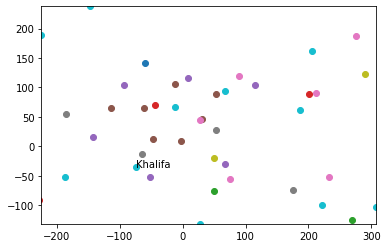

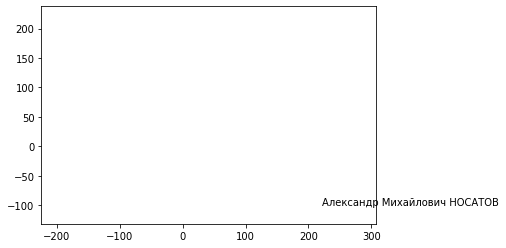

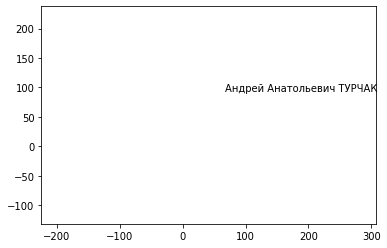

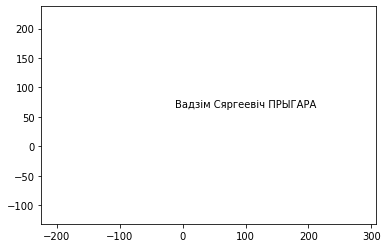

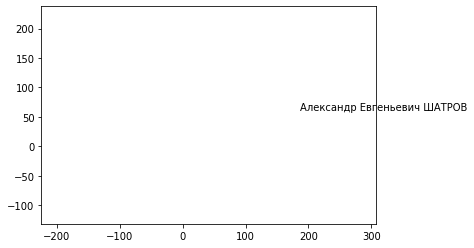

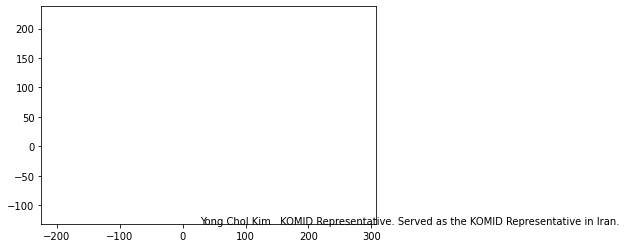

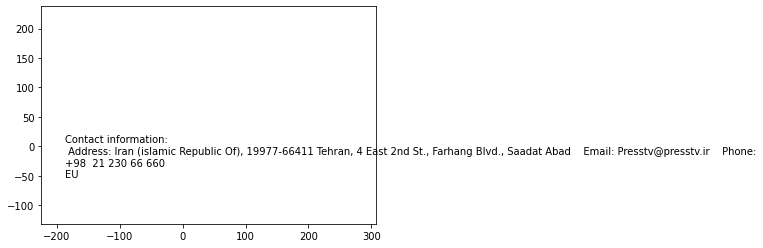

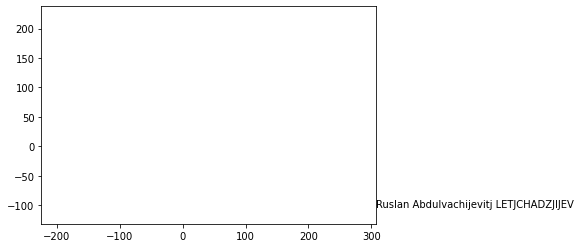

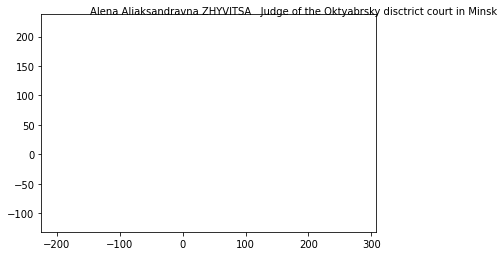

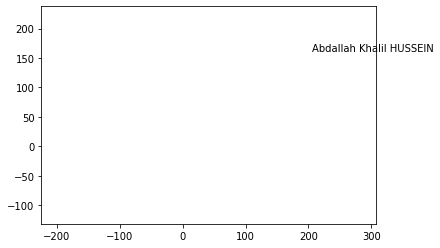

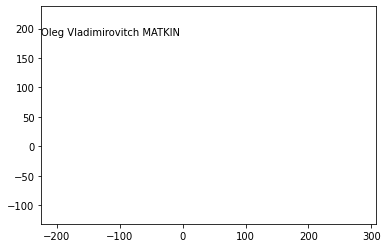

In [20]:
# test for visualization 

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
        tsne = TSNE(n_components=2, random_state=0, perplexity=4)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)
        x_coords = Y[:, 0]
        y_coords = Y[:, 1]
        plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()
display_closestwords_tsnescatterplot(model, 'Khalifa', 5) 

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib import pyplot
 
# #Preprocessing
# data = dbn_df['Identity information'] = dbn_df['Identity information'].apply(lambda content: [x for x in content.split(';')]) #Translating 'Identity information' into list object

# sentences_tokenized = []
# for i in data:
#     print(i)
#     # s = i.lower
#     # myPunc = '!"#%&$()*+-./:;,<=>?@[\\]^_`{|}~'
#     # s = s.translate(s.maketrans(myPunc, ' '*len(myPunc)))
#     # s = s.translate(s.maketrans(string.digits, ' '*len(string.digits)))
#     # s = re.sub('\s+',' ',s)
#     # print(s)
#     # for sentence in s:    
#     #     tokens = sentence.split(' ')
#     #     sentences_tokenized.append(tokens)




In [ ]:
# data1 = []
# for i in dbn_df['Identity information']:
#     # temp = []
#     # for j in i:
#     #     temp.append(j.lower())
#     # data.append(temp)
#     data1.append(i.lower())


In [ ]:
# Creating Word2Vec
model = Word2Vec(
    sentences = n,
    #size = 50,
    window = 10,
    #iter = 20,
    
)




In [ ]:
model.wv.key_to_index #Ausgabe aller Key-Vektor Paare in Word2Vec model


{'.': 0,
 'a': 1,
 'n': 2,
 'i': 3,
 'e': 4,
 'r': 5,
 'o': 6,
 ';': 7,
 't': 8,
 'A': 9,
 'l': 10,
 'd': 11,
 'm': 12,
 's': 13,
 'h': 14,
 '\\': 15,
 '2': 16,
 '1': 17,
 'M': 18,
 'u': 19,
 '3': 20,
 'S': 21,
 'c': 22,
 'I': 23,
 'v': 24,
 'f': 25,
 ':': 26,
 'O': 27,
 'и': 28,
 'R': 29,
 'j': 30,
 'V': 31,
 'k': 32,
 '4': 33,
 '5': 34,
 'K': 35,
 'а': 36,
 'N': 37,
 'H': 38,
 '6': 39,
 'C': 40,
 '0': 41,
 '9': 42,
 'b': 43,
 '8': 44,
 '7': 45,
 'E': 46,
 'y': 47,
 'T': 48,
 'g': 49,
 'е': 50,
 'D': 51,
 'L': 52,
 'B': 53,
 'в': 54,
 'р': 55,
 'А': 56,
 'л': 57,
 'о': 58,
 'н': 59,
 'В': 60,
 'G': 61,
 'J': 62,
 'U': 63,
 'F': 64,
 'О': 65,
 '-': 66,
 'ч': 67,
 'P': 68,
 'Y': 69,
 'Н': 70,
 'д': 71,
 'к': 72,
 'И': 73,
 'й': 74,
 'К': 75,
 'z': 76,
 'Е': 77,
 'Z': 78,
 'с': 79,
 'т': 80,
 'С': 81,
 'p': 82,
 'w': 83,
 ',': 84,
 'Р': 85,
 'м': 86,
 'г': 87,
 'Л': 88,
 'М': 89,
 'ь': 90,
 'ا': 91,
 'q': 92,
 'П': 93,
 'Д': 94,
 'Т': 95,
 'Г': 96,
 'Б': 97,
 'x': 98,
 'ل': 99,
 'У': 100

In [ ]:
ergebnisse = model.wv.most_similar(name, topn=5)

for y in ergebnisse:
    print(y)

KeyError: "Key 'pimmel' not present in vocabulary"